#Plotting the temperature pre and post Monsoon Season


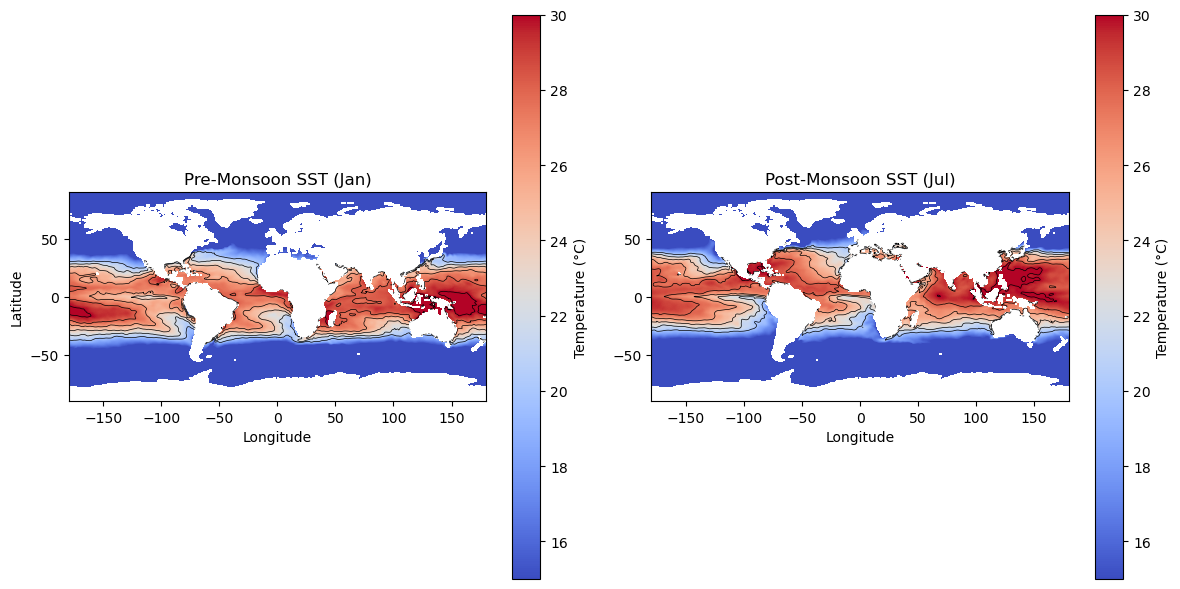

In [32]:


import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Load data
file_pre = '/Users/surjitsingh/Desktop/CS185C/Project/Visual/THETA_201701.nc'  # Pre-monsoon data
file_post = '/Users/surjitsingh/Desktop/CS185C/Project/Visual/THETA_201707.nc'  # Post-monsoon data

# Open datasets without decoding times
ds_pre = xr.open_dataset(file_pre, decode_times=False)
ds_post = xr.open_dataset(file_post, decode_times=False)


# Extract temperature at the surface level (time=0, depth=0)
temp_pre = ds_pre['THETA'][0, 0, :, :].values
temp_post = ds_post['THETA'][0, 0, :, :].values

# Mask invalid values (e.g., extreme or missing data)
temp_pre = np.ma.masked_where(temp_pre > 100, temp_pre)
temp_post = np.ma.masked_where(temp_post > 100, temp_post)

# Define plot extent
lon = ds_pre['LONGITUDE_T'][:]
lat = ds_pre['LATITUDE_T'][:]
extent = [lon.min(), lon.max(), lat.min(), lat.max()]

# Plot the data side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pre-Monsoon SST Plot
im1 = ax[0].imshow(temp_pre, cmap='coolwarm', extent=extent, origin='lower', vmin=15, vmax=30)
ax[0].set_title('Pre-Monsoon SST (Jan)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
fig.colorbar(im1, ax=ax[0], orientation='vertical', label='Temperature (°C)')

# Post-Monsoon SST Plot
im2 = ax[1].imshow(temp_post, cmap='coolwarm', extent=extent, origin='lower', vmin=15, vmax=30)
ax[1].set_title('Post-Monsoon SST (Jul)')
ax[1].set_xlabel('Longitude')
fig.colorbar(im2, ax=ax[1], orientation='vertical', label='Temperature (°C)')

# Add contours for more clarity
ax[0].contour(lon, lat, temp_pre, levels=np.linspace(20, 30, 6), colors='k', linewidths=0.5)
ax[1].contour(lon, lat, temp_post, levels=np.linspace(20, 30, 6), colors='k', linewidths=0.5)

# Show the plot
plt.tight_layout()
plt.show()


#Plotted with a more focus on our area of interest

Pre-Monsoon Subset Shape: (1, 50, 64, 56)
Post-Monsoon Subset Shape: (1, 50, 64, 56)


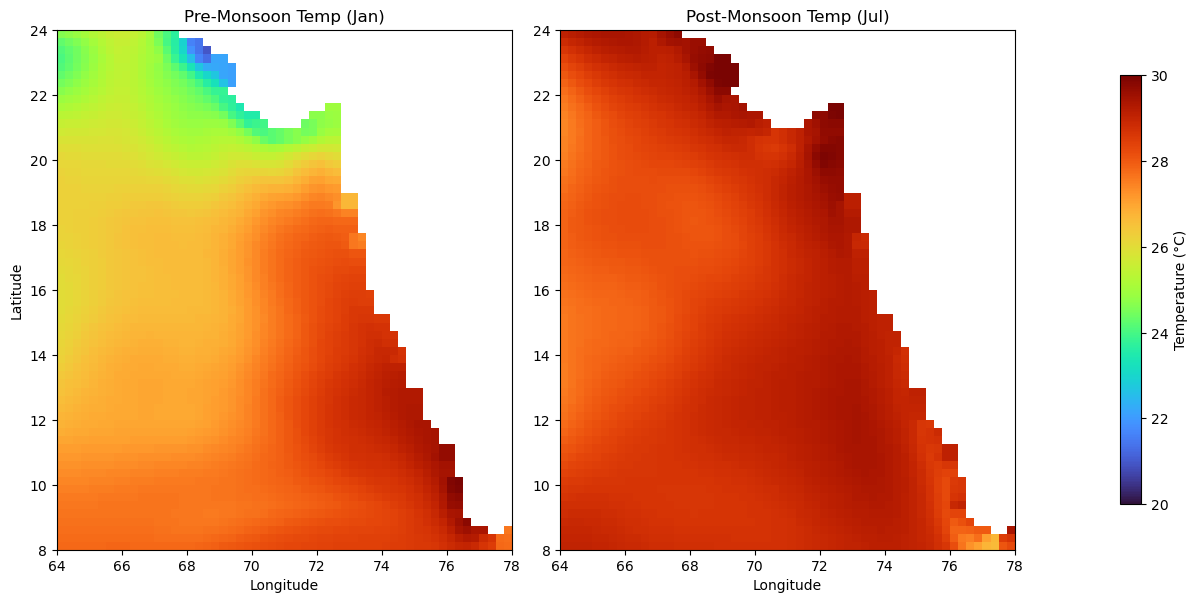

In [34]:
# Open the dataset (with decode_times=False for now)
ds_pre = xr.open_dataset(file_pre, decode_times=False)
ds_post = xr.open_dataset(file_post, decode_times=False)

# Define latitude and longitude bounds for the western coast of India
lat_min, lat_max = 8, 24      # Latitude range (adjust as needed)
lon_min, lon_max = 64, 78     # Longitude range (adjust as needed)

# Subset the pre-monsoon and post-monsoon datasets
ds_pre_subset = ds_pre.sel(LATITUDE_T=slice(lat_min, lat_max), LONGITUDE_T=slice(lon_min, lon_max))
ds_post_subset = ds_post.sel(LATITUDE_T=slice(lat_min, lat_max), LONGITUDE_T=slice(lon_min, lon_max))

# Verify the shape of the subsetted data
print("Pre-Monsoon Subset Shape:", ds_pre_subset['THETA'].shape)
print("Post-Monsoon Subset Shape:", ds_post_subset['THETA'].shape)

# Extract temperature data for the surface level (time=0, depth=0)
sst_pre = ds_pre_subset['THETA'][0, 0, :, :]
sst_post = ds_post_subset['THETA'][0, 0, :, :]

# Plot the subsetted data
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Pre-Monsoon SST
im1 = axes[0].imshow(sst_pre, origin='lower', cmap='turbo',
                     extent=[lon_min, lon_max, lat_min, lat_max], vmin=20, vmax=30)
axes[0].set_title("Pre-Monsoon Temp (Jan)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Post-Monsoon SST
im2 = axes[1].imshow(sst_post, origin='lower', cmap='turbo',
                     extent=[lon_min, lon_max, lat_min, lat_max], vmin=20, vmax=30)
axes[1].set_title("Post-Monsoon Temp (Jul)")
axes[1].set_xlabel("Longitude")

# Create a single color bar outside the subplots
cbar = fig.colorbar(im1, ax=axes, location='right', shrink=0.8, pad=0.1)
cbar.set_label("Temperature (°C)")

# Show the plot
plt.show()



# #Here we see that the plots highlight the significant impact of the seasonal monsoons on ocean stratification. Post-monsoon conditions lead to:Decreased surface temperatures due to vertical mixing, freshwater influx, and upwelling
Weakened stratification as cooler and fresher water reduces the temperature

# Making plots for Salinity

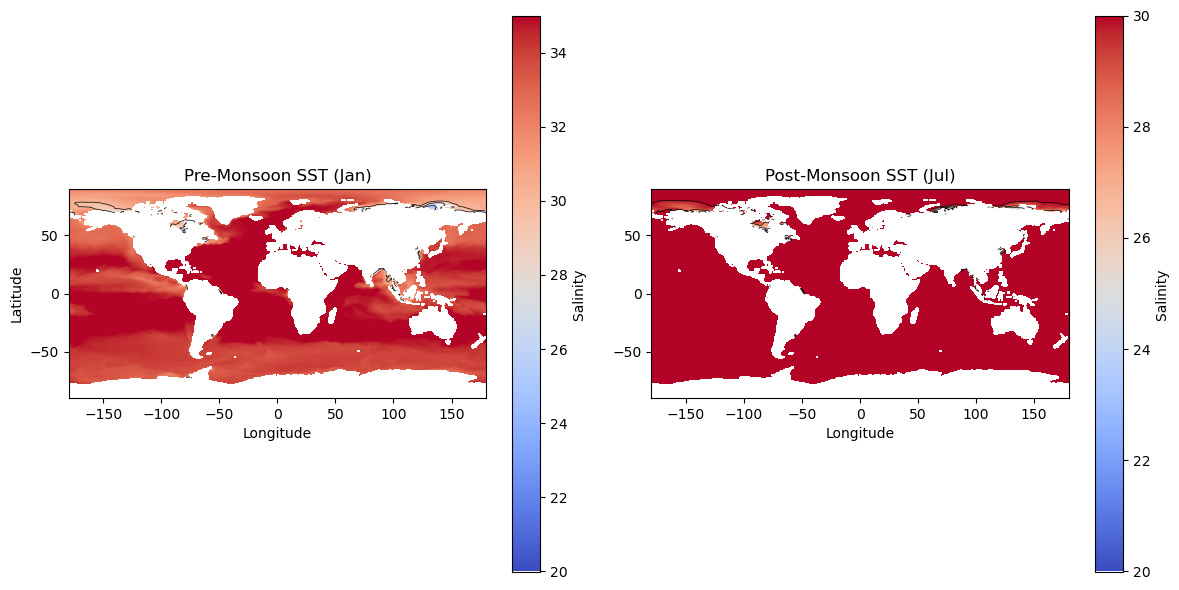

In [26]:


import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Load data
file_pre = '/Users/surjitsingh/Desktop/CS185C/Project/Visual/SALT_201701.nc'  # Pre-monsoon data
file_post = '/Users/surjitsingh/Desktop/CS185C/Project/Visual/SALT_201707.nc'  # Post-monsoon data

# Open datasets without decoding times
ds_pre = xr.open_dataset(file_pre, decode_times=False)
ds_post = xr.open_dataset(file_post, decode_times=False)


# Extract temperature at the surface level (time=0, depth=0)
temp_pre = ds_pre['SALT'][0, 0, :, :].values
temp_post = ds_post['SALT'][0, 0, :, :].values

# Mask invalid values (e.g., extreme or missing data)
temp_pre = np.ma.masked_where(temp_pre > 100, temp_pre)
temp_post = np.ma.masked_where(temp_post > 100, temp_post)

# Define plot extent
lon = ds_pre['LONGITUDE_T'][:]
lat = ds_pre['LATITUDE_T'][:]
extent = [lon.min(), lon.max(), lat.min(), lat.max()]

# Plot the data side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pre-Monsoon SST Plot
im1 = ax[0].imshow(temp_pre, cmap='coolwarm', extent=extent, origin='lower', vmin=20, vmax=35)
ax[0].set_title('Pre-Monsoon SST (Jan)')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
fig.colorbar(im1, ax=ax[0], orientation='vertical', label='Salinity ')

# Post-Monsoon SST Plot
im2 = ax[1].imshow(temp_post, cmap='coolwarm', extent=extent, origin='lower', vmin=20, vmax=30)
ax[1].set_title('Post-Monsoon SST (Jul)')
ax[1].set_xlabel('Longitude')
fig.colorbar(im2, ax=ax[1], orientation='vertical', label='Salinity ')

# Add contours for more clarity
ax[0].contour(lon, lat, temp_pre, levels=np.linspace(20, 30, 6), colors='k', linewidths=0.5)
ax[1].contour(lon, lat, temp_post, levels=np.linspace(20, 30, 6), colors='k', linewidths=0.5)

# Show the plot
plt.tight_layout()
plt.show()


Here we plot the pre and post Monsoon Salinity difference

Pre-Monsoon Subset Shape: (1, 50, 64, 56)
Post-Monsoon Subset Shape: (1, 50, 64, 56)


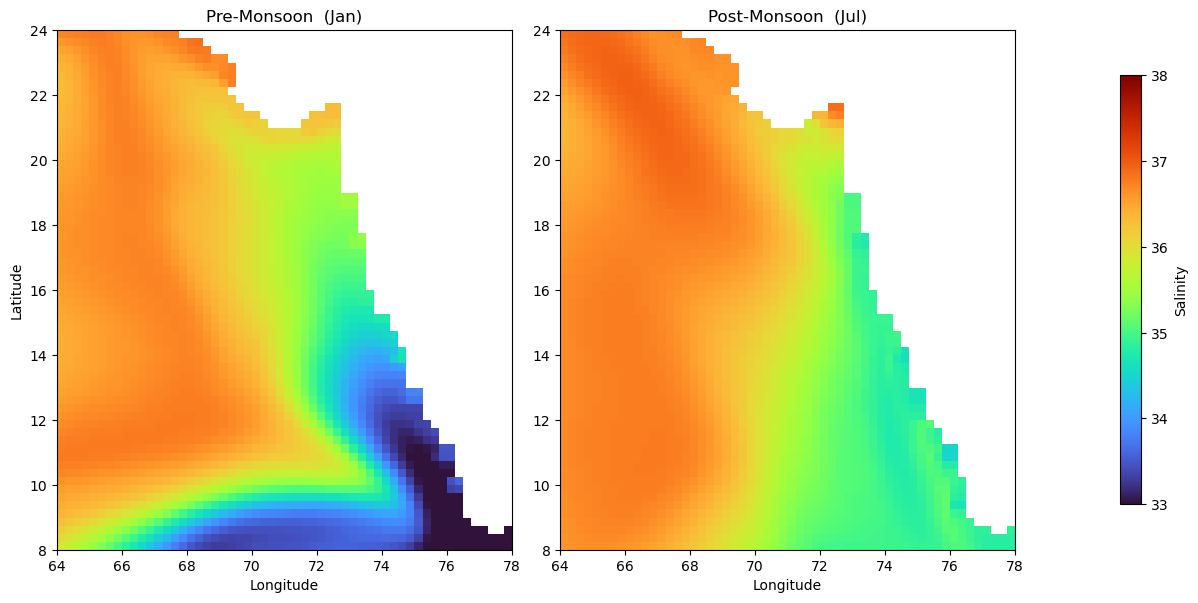

In [28]:
# Open the dataset (with decode_times=False for now)
ds_pre = xr.open_dataset(file_preS, decode_times=False)
ds_post = xr.open_dataset(file_postS, decode_times=False)

# Define latitude and longitude bounds for the western coast of India
lat_min, lat_max = 8, 24      # Latitude range (adjust as needed)
lon_min, lon_max = 64, 78     # Longitude range (adjust as needed)

# Subset the pre-monsoon and post-monsoon datasets
ds_pre_subset = ds_pre.sel(LATITUDE_T=slice(lat_min, lat_max), LONGITUDE_T=slice(lon_min, lon_max))
ds_post_subset = ds_post.sel(LATITUDE_T=slice(lat_min, lat_max), LONGITUDE_T=slice(lon_min, lon_max))

# Verify the shape of the subsetted data
print("Pre-Monsoon Subset Shape:", ds_pre_subset['SALT'].shape)
print("Post-Monsoon Subset Shape:", ds_post_subset['SALT'].shape)

# Extract temperature data for the surface level (time=0, depth=0)
sst_pre = ds_pre_subset['SALT'][0, 0, :, :]
sst_post = ds_post_subset['SALT'][0, 0, :, :]

# Plot the subsetted data
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# Pre-Monsoon SST
im1 = axes[0].imshow(sst_pre, origin='lower', cmap='turbo',
                     extent=[lon_min, lon_max, lat_min, lat_max], vmin=33, vmax=38)
axes[0].set_title("Pre-Monsoon  (Jan)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Post-Monsoon SST
im2 = axes[1].imshow(sst_post, origin='lower', cmap='turbo',
                     extent=[lon_min, lon_max, lat_min, lat_max], vmin=33, vmax=38)
axes[1].set_title("Post-Monsoon  (Jul)")
axes[1].set_xlabel("Longitude")

# Create a single color bar outside the subplots
cbar = fig.colorbar(im1, ax=axes, location='right', shrink=0.8, pad=0.1)
cbar.set_label("Salinity")

# Show the plot
plt.show()


We see that the Salinity levels are  higher in pre monsoon this is because the absence of monsoon rains results in minimal freshwater input.Evaporation during dry months can lead to increased salinity, especially near the coast which we see in the pre monsoon plot. In the post monsoon plot we see that the Salinity levels are lower especially in the costal parts of the plot this is because the freshwater from the monsoons dilutes the surface Salinity. 